In [1]:
#import necessary libraries (KElbowVisualizer discussed in write-up)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#load and store the two science2k np arrays
docs_by_vocab = np.load("science2k-doc-word.npy")
vocab_by_docs = np.load("science2k-word-doc.npy")

In [3]:
#open the text files to be read in. Create empty lists to store the cleansed contents extracted from the text files
open_doc_titles = open('science2k-titles.txt')
open_vocab = open('science2k-vocab.txt')
document_titles = list()
vocab_list = list()

In [4]:
#read each line of text from the two text files(titles and vocab)
#strip linebreaks and quotes before appending to cleansed lists
for row in open_doc_titles:
    row = row.strip('\n')
    row = row.strip('"')
    document_titles.append(row)

for row1 in open_vocab:
    row1 = row1.strip('\n')
    vocab_list.append(row1)

In [5]:
#convert the cleansed lists to numpy arrays
document_titles_np = np.array(document_titles)
vocab_np = np.array(vocab_list)

In [ ]:
###Part A

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F7D7CE148>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

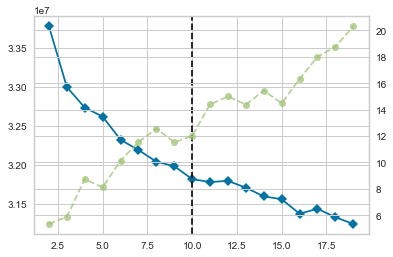

In [6]:
#import KElbowVisualizer from scikit's yellowbrick (downloaded to streamline optimal k selection)
#the function will determine optimal k and provide a score with distortion metric
kmeans = KMeans(random_state=0)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,20))
elbow_visualizer.fit(docs_by_vocab)

In [7]:
#print results from elbow visualizer
print('Elbow value =',elbow_visualizer.elbow_value_)
print('Score = %0.3f'% elbow_visualizer.elbow_score_)

Elbow value = 10
Score = 31816859.096


In [8]:
#store the optimal k value
num_clusters = elbow_visualizer.elbow_value_

In [9]:
###Once we have found the optimal k we can begin to cluster the data and analyze it

In [10]:
#call Kmeans on the optimal k val and fit it for docs_by_vocab
kmeans = KMeans(n_clusters=num_clusters,random_state=0 ).fit(docs_by_vocab)

In [11]:
#calculate x_bar and mu for each cluster, and then calculate the difference between each mu(cluster center) and x_bar
x_bar = np.mean(docs_by_vocab, axis = 0)
m_i = np.copy(kmeans.cluster_centers_)
m_i_minus_x_bar = np.subtract(m_i,x_bar)
abs_m_i_minus_x_bar = np.absolute(m_i_minus_x_bar)

In [12]:
#report the top words for each cluster with the largest positive distance
#iterate through each cluster and use argpartition to find the 10 indixes(words) with the largest positive distance
#create a dictionary with the words as keys and the distances as values
#print the results
for i in range(num_clusters):
    top_10_indices = np.argpartition(m_i_minus_x_bar[i],-10)[-10:]

    dictionary = dict()
    for j in range(10):
        dictionary[vocab_list[top_10_indices[j]]] = m_i_minus_x_bar[i][top_10_indices[j]]
    dictionary = sorted(dictionary.items(),key = lambda x: x[1],reverse = True)
    
    print('Top 10 Words/values for cluster #%0.0f:'% (i+1))
    for k in range(10):
        print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))
    print('\n')

Top 10 Words/values for cluster #1:
1. energy: 5.216
2. electron: 4.513
3. fig: 4.037
4. shows: 3.746
5. temperature: 3.716
6. structure: 3.649
7. measurements: 3.565
8. experimental: 3.509
9. measured: 3.393
10. density: 3.382


Top 10 Words/values for cluster #2:
1. mail: 3.466
2. compass: 2.082
3. author: 1.997
4. issue: 1.715
5. page: 1.578
6. sciences: 1.461
7. news: 1.313
8. policy: 1.193
9. article: 1.176
10. scientific: 1.120


Top 10 Words/values for cluster #3:
1. hiv: 11.997
2. sivcpz: 11.865
3. viruses: 11.471
4. chimpanzee: 10.860
5. primate: 10.662
6. monkey: 10.625
7. siv: 10.497
8. lineages: 10.454
9. aids: 10.393
10. phylogenetic: 10.381


Top 10 Words/values for cluster #4:
1. sequence: 7.031
2. genome: 6.560
3. sequences: 6.524
4. gene: 6.255
5. genes: 6.207
6. dna: 5.858
7. genomic: 5.309
8. genetic: 4.692
9. nucleotide: 4.515
10. chromosome: 4.511


Top 10 Words/values for cluster #5:
1. fig: 3.469
2. significant: 3.284
3. mean: 2.857
4. significantly: 2.683
5. rep

In [13]:
#Report the top 10 documents from a given cluster that fall closest to that respective cluster center
#if a cluster has less than 10 documents, the top N are printed. If 1 print the document title with 0 distance
#when cluster size is 2, the distance to both points is the same because the cluster center will be in between them

#code comments
#iterate through each cluster. 
#For given cluster, find the labels in the dataset that match the label for the current cluster
#we want to isolate only the labels associated with the given cluster, but maintain their original indices to look up the 
#appropriate document names
#we use np.where and argsort to accomplish this
#we then create an array of only the rows associated with the desired label (a subset of the dataset for given label)
#we then calculate euclidean distances between each vector and the cluster center to see which vectors are the closest
#we create dictionaries to store the keys as the document names and values as distances
#we have three cases to account for --> if only 1 item in cluster print it, if less than 10 print top N, otherwise top 10
for i in range(num_clusters):
    
    indices_where_i, = np.where(kmeans.labels_ == i)
    indices_where_i[np.argsort(kmeans.labels_[indices_where_i])]
    
    cluster_i_docs_by_vocab = []
    for a in range(len(docs_by_vocab)):
        for b in range(len(indices_where_i)):
            if a == indices_where_i[b]:
                cluster_i_docs_by_vocab.append(docs_by_vocab[a])
    
    cluster_i_docs_by_vocab = np.array(cluster_i_docs_by_vocab)
    
    
    reshape_cluster = np.reshape(kmeans.cluster_centers_[i], (1, -1))
    euc_distances = euclidean_distances(cluster_i_docs_by_vocab,reshape_cluster).transpose()
    
    if len(cluster_i_docs_by_vocab) == 1:
        print('Top 1 Closest Documents/Distances for cluster #%0.0f:'% (i+1))
        print('1.',document_titles[indices_where_i[0]]+': 0.000')
        print('\n') 
    
    elif len(cluster_i_docs_by_vocab) > 1 and len(cluster_i_docs_by_vocab) < 10:
        cluster_length = len(cluster_i_docs_by_vocab)
        n_closest_docs = np.argpartition(euc_distances[0],cluster_length-1)[:cluster_length]
        
        dictionary = dict()
        for j in range(cluster_length):
            dictionary[document_titles[indices_where_i[j]]] = euc_distances[0][n_closest_docs[j]] 
        dictionary = sorted(dictionary.items(),key = lambda x: x[1])

        print('Top',cluster_length,'Closest Documents/Distances for cluster #%0.0f:'% (i+1))
        for k in range(cluster_length):
            print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))
        print('\n')  
        
    else:
        ten_closest_docs = np.argpartition(euc_distances[0],10)[:10]

        dictionary = dict()
        for j in range(10):
            dictionary[document_titles[indices_where_i[j]]] = euc_distances[0][ten_closest_docs[j]]
        dictionary = sorted(dictionary.items(),key = lambda x: x[1])

        print('Top 10 Closest Documents/Distances for cluster #%0.0f:'% (i+1))
        for k in range(10):
            print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))
        print('\n')

Top 10 Closest Documents/Distances for cluster #1:
1. Communication through a Diffusive Medium: Coherence and Capacity: 121.814
2. Evidence for a Low-Density Universe from the Relative Velocities of Galaxies: 124.684
3. Generating Solitons by Phase Engineering of a Bose-Einstein Condensate: 127.947
4. Mirrorless Lasing from Mesostructured Waveguides Patterned by Soft Lithography: 129.912
5. Equilibrium Regained: From Nonequilibrium Chaos to Statistical Mechanics: 130.442
6. Direct Observation of Dynamical Heterogeneities in Colloidal Hard-Sphere Suspensions: 131.168
7. A Short Fe-Fe Distance in Peroxodiferric Ferritin: Control of Fe Substrate versus Cofactor Decay?: 131.405
8. Reaction of Plutonium Dioxide with Water: Formation and Properties of <latex>$PuO_{2+x}$</latex>: 133.178
9. Formation of Cyclic Water Hexamer in Liquid Helium: The Smallest Piece of Ice: 133.538
10. Detection of Molecular Alignment in Confined Films: 133.632


Top 10 Closest Documents/Distances for cluster #2:
1

In [14]:
#check test to make sure that all print outs with more/less than 10 actually have more/less than 10 labels for that cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([174, 427,   1,  63, 118, 140, 267,   1,  36, 146], dtype=int64))

In [15]:
###PART B

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F0744F988>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

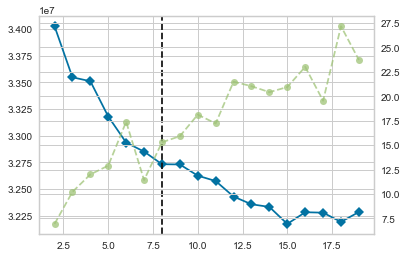

In [16]:
#import KElbowVisualizer from scikit's yellowbrick (downloaded to streamline optimal k selection)
#the function will determine optimal k and provide a score with distortion metric
kmeans = KMeans(random_state=0)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,20))
elbow_visualizer.fit(vocab_by_docs)

In [17]:
#print results from elbow visualizer
print('Elbow value =',elbow_visualizer.elbow_value_)
print('Score = %0.3f'% elbow_visualizer.elbow_score_)

Elbow value = 8
Score = 32732929.194


In [18]:
#store the optimal k value
num_clusters = elbow_visualizer.elbow_value_

In [19]:
#fit KMeans with the optimal k
kmeans = KMeans(n_clusters=num_clusters,random_state=0 ).fit(vocab_by_docs)

In [20]:
#calculate x_bar and mu for each cluster, and then calculate the difference between each mu(cluster center) and x_bar
x_bar = np.mean(vocab_by_docs, axis = 0)
m_i = np.copy(kmeans.cluster_centers_)
m_i_minus_x_bar = np.subtract(m_i,x_bar)
abs_m_i_minus_x_bar = np.absolute(m_i_minus_x_bar)

In [22]:
#report the top articles for each cluster with the largest positive distance
#iterate through each cluster and use argpartition to find the 10 indixes(articles) with the largest positive distance
#create a dictionary with the articles as keys and the distances as values
#print the results
for i in range(num_clusters):
    top_10_indices = np.argpartition(m_i_minus_x_bar[i],-10)[-10:]

    dictionary = dict()

    for j in range(10):
        dictionary[document_titles[top_10_indices[j]]] = m_i_minus_x_bar[i][top_10_indices[j]]
    
    dictionary = sorted(dictionary.items(),key = lambda x: x[1],reverse = True)
    
    print('Top 10 Articles/values for cluster #%0.0f:'% (i+1))
    
    for k in range(10):
        print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))
    
    print('\n')

Top 10 Articles/values for cluster #1:
1. Atom-Scale Research Gets Real: 6.482
2. Ecologists on a Mission to Save the World: 5.754
3. Help Needed to Rebuild Science in Yugoslavia: 5.744
4. I'd like to See America Used as a Global Lab: 5.734
5. Creation's Seventh Day: 5.635
6. Meltdown on Long Island: 5.547
7. Breakthrough of the Year: Genomics Comes of Age: 5.546
8. Clones: A Hard Act to Follow: 5.400
9. A Mouse Chronology: 5.398
10. Designer Labs: Architecture Discovers Science: 5.302


Top 10 Articles/values for cluster #2:
1. A Mouse Chronology: 3.218
2. Meltdown on Long Island: 2.651
3. Presidential Forum: Gore and Bush Offer Their Views on Science: 2.613
4. Atom-Scale Research Gets Real: 2.224
5. Help Needed to Rebuild Science in Yugoslavia: 2.223
6. Silent No Longer: 'Model Minority' Mobilizes: 2.190
7. Soft Money's Hard Realities: 2.064
8. The Rise of the Mouse, Biomedicine's Model Mammal: 2.042
9. Ecologists on a Mission to Save the World: 2.009
10. I'd like to See America Used

In [23]:
#Report the top 10 words from a given cluster that fall closest to that respective cluster center
#if a cluster has less than 10 words, the top N are printed. If 1 print the word with 0 distance
#when cluster size is 2, the distance to both points is the same because the cluster center will be in between them

#code comments
#iterate through each cluster. 
#For given cluster, find the labels in the dataset that match the label for the current cluster
#we want to isolate only the labels associated with the given cluster, but maintain their original indices to look up the 
#appropriate document names
#we use np.where and argsort to accomplish this
#we then create an array of only the rows associated with the desired label (a subset of the dataset for given label)
#we then calculate euclidean distances between each vector and the cluster center to see which vectors are the closest
#we create dictionaries to store the keys as the document names and values as distances
#we have three cases to account for --> if only 1 item in cluster print it, if less than 10 print top N, otherwise top 10
for i in range(num_clusters):
    indices_where_i, = np.where(kmeans.labels_ == i)
    indices_where_i[np.argsort(kmeans.labels_[indices_where_i])]
    
    cluster_i_vocab_by_docs = []
    for a in range(len(vocab_by_docs)):
        for b in range(len(indices_where_i)):
            if a == indices_where_i[b]:
                cluster_i_vocab_by_docs.append(vocab_by_docs[a])
    
    cluster_i_vocab_by_docs = np.array(cluster_i_vocab_by_docs)
    
    
    reshape_cluster = np.reshape(kmeans.cluster_centers_[i], (1, -1))
    euc_distances = euclidean_distances(cluster_i_vocab_by_docs,reshape_cluster).transpose()
    
    
    if len(cluster_i_vocab_by_docs) == 1:
        print('Top 1 Closest Words/Distances for cluster #%0.0f:'% (i+1))
        print('1.',vocab_list[indices_where_i[0]]+': 0.000')
        print('\n') 
    
    elif len(cluster_i_vocab_by_docs) > 1 and len(cluster_i_vocab_by_docs) <= 10:
        cluster_length = len(cluster_i_vocab_by_docs)
        #print(cluster_length)
        n_closest_docs = np.argpartition(euc_distances[0],cluster_length-1)[:cluster_length]
        
        dictionary = dict()

        for j in range(cluster_length):
            dictionary[vocab_list[indices_where_i[j]]] = euc_distances[0][n_closest_docs[j]] 

        #print(dictionary)
        dictionary = sorted(dictionary.items(),key = lambda x: x[1])

        print('Top',cluster_length,'Closest Words/Distances for cluster #%0.0f:'% (i+1))

        for k in range(cluster_length):
            print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))

        print('\n')  
        
    else:
        ten_closest_docs = np.argpartition(euc_distances[0],10)[:10]
        dictionary = dict()

        for j in range(10):
            dictionary[vocab_list[indices_where_i[j]]] = euc_distances[0][ten_closest_docs[j]]

        dictionary = sorted(dictionary.items(),key = lambda x: x[1])

        print('Top 10 Closest Words/Distances for cluster #%0.0f:'% (i+1))
        for k in range(10):
            print('%0.0f.'% (k+1),dictionary[k][0] +':','%0.3f' % (dictionary[k][1]))
        print('\n')

Top 10 Closest Words/Distances for cluster #1:
1. says: 63.604
2. new: 67.784
3. like: 69.313
4. first: 70.808
5. university: 72.943
6. long: 76.031
7. research: 76.473
8. years: 76.538
9. year: 77.129
10. see: 78.487


Top 10 Closest Words/Distances for cluster #2:
1. group: 39.484
2. development: 40.417
3. study: 42.067
4. states: 42.790
5. major: 43.017
6. hiv: 43.246
7. information: 43.487
8. disease: 43.682
9. population: 44.009
10. stem: 44.707


Top 1 Closest Words/Distances for cluster #3:
1. number: 0.000


Top 10 Closest Words/Distances for cluster #4:
1. cells: 67.069
2. cell: 67.961
3. gene: 68.229
4. dna: 70.022
5. protein: 70.711
6. mice: 71.483
7. proteins: 71.933
8. type: 72.181
9. expression: 72.494
10. genes: 72.921


Top 10 Closest Words/Distances for cluster #5:
1. data: 100.301
2. different: 100.383
3. high: 103.923
4. shown: 105.168
5. start: 107.153
6. observed: 108.030
7. surface: 109.548
8. time: 109.840
9. fig: 111.449
10. two: 111.539


Top 10 Closest Words/D

In [24]:
#check test to make sure that all print outs with more/less than 10 actually have more/less than 10 labels for that cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  82,  728,    1,  345,  186,  499, 2913,  722], dtype=int64))